In [1]:
import os
os.chdir("/home/gf/src/Python/Python-in-the-lab/Bk") # Insert here your directory. Windows should have "\" instead of "/"
os.path.abspath(".")

'/home/gf/src/Python/Python-in-the-lab/Bk'

In [2]:
filename = "F64ac_0.02_T.dat"

Ok, I did lecture 1 so...
Can we now open the file, please?

## Method 1: hard rock

In [3]:
f = open(filename) # We need to be in the directory containing the file
data = f.readlines()
f.close() # MANDATORY, do not forget!

In [4]:
data[:10] # Let's printthe first 10 lines

['5.01924E-006 0\n',
 '6.31885E-006 0\n',
 '7.95496E-006 0\n',
 '1.00147E-005 0\n',
 '1.26078E-005 0\n',
 '1.58722E-005 0\n',
 '1.9982E-005 0\n',
 '2.51558E-005 0\n',
 '3.16693E-005 0\n',
 '3.98693E-005 509496\n']

It looks like a list of two columns of numbers, with boaring elements like "\\n". Not very efficient!

### How can we get the numbers as two columns x and y?

In [5]:
col0, col1 = [], [] # Empty list
for row in data:
    c0, c1 = row.split() # Get rid of spaces, and return characters, etc...
    c0, c1 = float(c0), float(c1) # Att. c0,c1 = float(line.split()) does not work
    col0.append(c0)
    col1.append(c1)
# Ohhhh, what's wrong????

ValueError: not enough values to unpack (expected 2, got 0)

In [7]:
row
# Eh?

'\n'

In [8]:
data[-5:]

['0.19982 0\n', '0.251558 0\n', '0.316693 0\n', '0.398693 0\n', '\n']

In [9]:
col0, col1 = [], [] # Empty list
for row in data[:-1]:
    c0, c1 = row.split() # Get rid of spaces, and return characters, etc...
    c0, c1 = float(c0), float(c1) # Att. c0,c1 = float(line.split()) does not work
    col0.append(c0)
    col1.append(c1)
# Cool...

In [10]:
type(col0[0]), col0[0]

(float, 5.01924e-06)

### Using the list comprehension

https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions

In [11]:
# I make a loop of the rows first, splitting the two numbers
[row.split() for row in data[:-1]][:10]

[['5.01924E-006', '0'],
 ['6.31885E-006', '0'],
 ['7.95496E-006', '0'],
 ['1.00147E-005', '0'],
 ['1.26078E-005', '0'],
 ['1.58722E-005', '0'],
 ['1.9982E-005', '0'],
 ['2.51558E-005', '0'],
 ['3.16693E-005', '0'],
 ['3.98693E-005', '509496']]

In [12]:
# Now I use the two numbers from the row.split()
q = [float(c) for row in data[:-1] for c in row.split()] # This is a long list
print(q[:10])

[5.01924e-06, 0.0, 6.31885e-06, 0.0, 7.95496e-06, 0.0, 1.00147e-05, 0.0, 1.26078e-05, 0.0]


### Ah, ah, we are close: wouldn't it be nice to make a two cols array just reshaping?

## Welcome numpy and numpy array!

In [13]:
# Everything can be done in a single line 
import numpy as np
d = np.array([float(c) for row in data[:-1] for c in row.split()]).reshape((-1,2))
d[:10]

array([[5.01924e-06, 0.00000e+00],
       [6.31885e-06, 0.00000e+00],
       [7.95496e-06, 0.00000e+00],
       [1.00147e-05, 0.00000e+00],
       [1.26078e-05, 0.00000e+00],
       [1.58722e-05, 0.00000e+00],
       [1.99820e-05, 0.00000e+00],
       [2.51558e-05, 0.00000e+00],
       [3.16693e-05, 0.00000e+00],
       [3.98693e-05, 5.09496e+05]])

### Man, you are too fast, I did not understand.

In [14]:
# As a list cannot be reshaped, we do it using numpy array
q = [float(c) for row in data[:-1] for c in row.split()] # This is a long list
q = np.array(q)
# Now I can reshape using two columns. I do not know how many rows are present, so I put -1
q = q.reshape(-1,2)
q[:10]

array([[5.01924e-06, 0.00000e+00],
       [6.31885e-06, 0.00000e+00],
       [7.95496e-06, 0.00000e+00],
       [1.00147e-05, 0.00000e+00],
       [1.26078e-05, 0.00000e+00],
       [1.58722e-05, 0.00000e+00],
       [1.99820e-05, 0.00000e+00],
       [2.51558e-05, 0.00000e+00],
       [3.16693e-05, 0.00000e+00],
       [3.98693e-05, 5.09496e+05]])

In [15]:
# In a single line
q = np.array([float(c) for row in data[:-1] for c in row.split()]).reshape(-1,2)
q[:10]

array([[5.01924e-06, 0.00000e+00],
       [6.31885e-06, 0.00000e+00],
       [7.95496e-06, 0.00000e+00],
       [1.00147e-05, 0.00000e+00],
       [1.26078e-05, 0.00000e+00],
       [1.58722e-05, 0.00000e+00],
       [1.99820e-05, 0.00000e+00],
       [2.51558e-05, 0.00000e+00],
       [3.16693e-05, 0.00000e+00],
       [3.98693e-05, 5.09496e+05]])

### Clear now?

In [16]:
# Now I need to horizontally split the array in two
x, y = np.hsplit(q,2)
# or simply call the two columns
x, y = q[:,0], q[:,1]

## Method 2: a little less hard rock

In [17]:
with open(filename) as f:
    data = f.readlines()
# NO NEED TO CLOSE THE FILE, IT IS AUTOMATIC
# data as above
q = np.array([float(c) for row in data[:-1] for c in row.split()]).reshape((-1,2))
x, y = np.hsplit(q,2)

## Method 3: the pythonic way

In [18]:
data = np.loadtxt(filename) # Exercise: explore the loadtxt help or check on the numpy website

In [19]:
type(data)

numpy.ndarray

In [20]:
data.shape

(50, 2)

In [21]:
data.size

100

In [22]:
data[:10] # it's a 2D array: where is the other axis???

array([[5.01924e-06, 0.00000e+00],
       [6.31885e-06, 0.00000e+00],
       [7.95496e-06, 0.00000e+00],
       [1.00147e-05, 0.00000e+00],
       [1.26078e-05, 0.00000e+00],
       [1.58722e-05, 0.00000e+00],
       [1.99820e-05, 0.00000e+00],
       [2.51558e-05, 0.00000e+00],
       [3.16693e-05, 0.00000e+00],
       [3.98693e-05, 5.09496e+05]])

In [23]:
data[0,0] # sounds familiar?

5.01924e-06

In [24]:
x, y = data[:,0], data[:,1] #or
x, y = np.hsplit(data,2)

## Method 4: the real best pythonic way

In [25]:
# Isn't a better and faster way to do it? It's python!
x, y = np.loadtxt(filename, unpack=True) #Uauu, isn't it nice?

In the *hard rock* case we use many lines (it was an excuse to learn something else, of course). Here everything is in one line: this happens very often and is called refactoring: find the best, clearest and shortest code

In [26]:
x,y = np.genfromtxt(filename, unpack=True) # This works too. Check the documentation
# https://docs.scipy.org/doc/numpy/user/basics.io.genfromtxt.html


#### Homework: explore the differences between loadtxt and genfromtxt

# Ok, stop: plot, please!

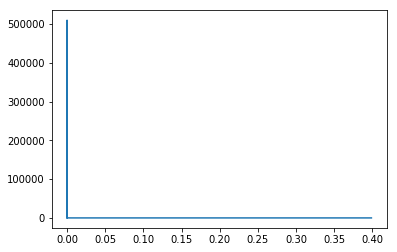

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y)

Oh, man! You are joking!

I try myself... let me think... a little more... ok, found

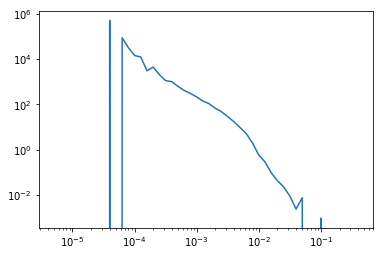

In [28]:
plt.loglog(x,y); 

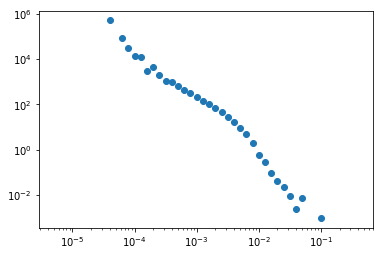

In [29]:
# I prefer dots, please
plt.loglog(x,y,'o'); # suppress the output ;

## Problem n. 2
### How can we plot all the files F64ac_someFreq_T.dat at different frequencies with a nice label etc etc???

In [30]:
# Let's find a pattern in the filename we are interested in
import glob
glob.glob("F64ac_*_T.dat")

['F64ac_0.03_time_V_T.dat',
 'F64ac_0.02_ave_S_vs_T.dat',
 'F64ac_0.02_T.dat',
 'F64ac_0.03_T.dat',
 'F64ac_0.01_time_V_T.dat',
 'F64ac_0.03_ave_S_vs_T.dat',
 'F64ac_0.02_time_V_T.dat',
 'F64ac_0.01_T.dat',
 'F64ac_0.01_ave_S_vs_T.dat']

Oh, too many! 

The "*" takes an arbitrary number of data
One or two only?

In [31]:
glob.glob("F64ac_0.??_T.dat") # cool

['F64ac_0.02_T.dat', 'F64ac_0.03_T.dat', 'F64ac_0.01_T.dat']

An unordered list, by the way

In [32]:
filenames = sorted(glob.glob("F64ac_0.0?_T.dat")) # nice
filenames

['F64ac_0.01_T.dat', 'F64ac_0.02_T.dat', 'F64ac_0.03_T.dat']

Can I plot them all together?

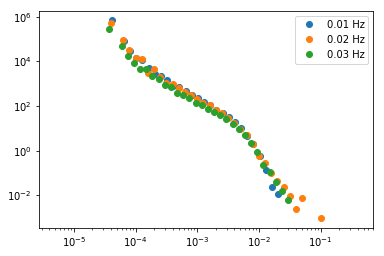

In [33]:
# Sure
for filename in filenames:
    x, y = np.loadtxt(filename,unpack=True)
    # Let's extract the frequency value to make a legend
    material, freq, meas = filename.split("_")
    lb = "{0} Hz".format(freq)
    plt.loglog(x,y,'o',label=lb) # I use the same plot
plt.legend(numpoints=1)

### Stop, man, I do not understand the logic!
How does it know to put the new data in the same plot?

(teacher) Hem, it uses the same figure...

Oh, I see, but we did not tell him to make a figure, at least, explicity... Does it do something behind the curtain?

(teacher) Very good point! *Explicit is better than implicit!*

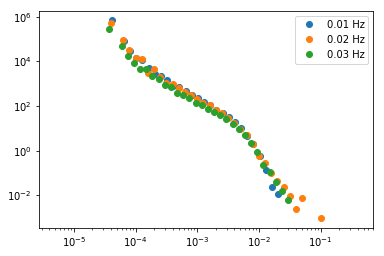

In [46]:
# Let's declare the figure, then add a (sub)plot
fig = plt.figure()
ax = fig.add_subplot(111) # 111 stands for: 1 row, 1 colums, fig n. 1
for filename in filenames:
    x, y = np.loadtxt(filename,unpack=True)
    # Let's extract the frequency value to make a legend
    material, freq, meas = filename.split("_")
    lb = "{0} Hz".format(freq)
    ax.loglog(x,y,'o',label=lb) # I use the same plot, explicitly
# plt.legend(numpoints=1);
ax.legend(numpoints=1)

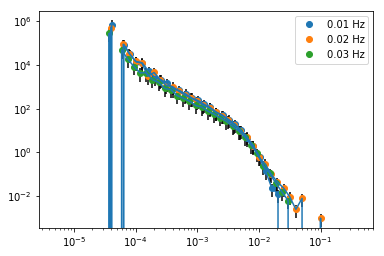

In [47]:
# My boss wants the error bars... :(
fig = plt.figure()
ax = fig.add_subplot(111)
for filename in filenames:
    x, y = np.loadtxt(filename,unpack=True)
    yerr = y * 0.6
    material, freq, meas = filename.split("_")
    lb = "{0} Hz".format(freq)
    ax.loglog(x,y,'o',label=lb) 
    ax.errorbar(x,y,yerr,fmt="",ecolor='k')
ax.legend();

Oh, the autoscale does not work! Or does it?
Better to check the data

In [36]:
y[:10]

array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0., 281709.])

Oh, it is full of zero values. Can we get rid of them?

In [37]:
is_not_zero = y!=0 # Breath first
is_not_zero

array([False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False])

In [38]:
# Ok let me redefine x and y
x, y = x[is_not_zero], y[is_not_zero]
y

array([2.81709e+05, 4.79296e+04, 1.81690e+04, 8.39005e+03, 4.32740e+03,
       4.32954e+03, 2.10176e+03, 1.58280e+03, 8.39195e+02, 7.36124e+02,
       3.91619e+02, 2.96808e+02, 2.19558e+02, 1.38495e+02, 1.17083e+02,
       7.62096e+01, 5.55879e+01, 3.80288e+01, 2.62899e+01, 1.52914e+01,
       9.44287e+00, 4.95448e+00, 2.13223e+00, 8.80718e-01, 2.38318e-01,
       1.09918e-01, 3.88048e-02, 1.54119e-02, 6.12104e-03])

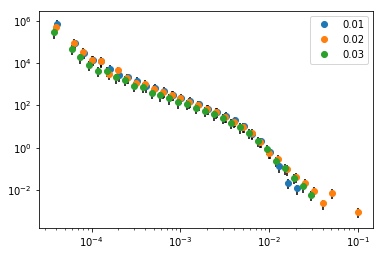

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
for filename in filenames:
    x, y = np.loadtxt(filename,unpack=True)
    is_not_zero = y!=0
    x, y = x[is_not_zero], y[is_not_zero]
    yerr = y * 0.5
    material, freq, meas = filename.split("_")
    lb = "{0} Hz".format(freq)
    ax.loglog(x,y,'o',label=freq)
    ax.errorbar(x,y,yerr,fmt="none",ecolor='k')
ax.legend();

Text(0.5, 1.0, 'Test 1')

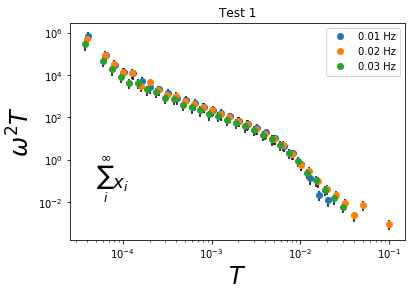

In [51]:
# Ok, boss, hold on, let me finish....
fig = plt.figure()
ax = fig.add_subplot(111)
for filename in filenames:
    x, y = np.loadtxt(filename,unpack=True)
    is_not_zero = y!=0
    x, y = x[is_not_zero], y[is_not_zero]
    yerr = y * 0.5  
    material, freq, meas = filename.split("_")
    lb = "{0} Hz".format(freq)
    ax.loglog(x,y,'o',label=lb) 
    ax.errorbar(x,y,yerr,fmt="none",ecolor='k')
ax.legend()
ax.set_xlabel("$T$", size=24)
ax.set_ylabel("$\omega^2 T$", size=24)
ax.annotate("$\sum_i^\infty x_i$", (5e-5,.05), size=18)
ax.set_title("Test 1")

There is a little problem here, small, but it is better to solve it

The error bar has a different color than the dots....
here a solution

Text(0.5, 1.0, 'Test 1')

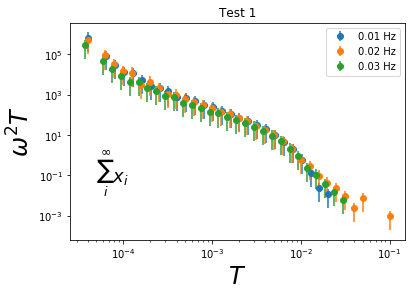

In [52]:
# Error bar with the right color
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
for filename in filenames:
    x, y = np.loadtxt(filename,unpack=True)
    is_not_zero = y!=0
    x, y = x[is_not_zero], y[is_not_zero]
    yerr = y * 0.8 
    material, freq, meas = filename.split("_")
    lb = "{0} Hz".format(freq)
    # ax.loglog(x,y,'o',label=lb) 
    ax.errorbar(x,y,yerr,fmt="o", label=lb)
ax.legend()
ax.set_xlabel("$T$", size=24)
ax.set_ylabel("$\omega^2 T$", size=24)
ax.annotate("$\sum_i^\infty x_i$", (5e-5,.05), size=18)
ax.set_title("Test 1")

### How can we add different markers?

In [ ]:
# Further points can be found here: http://matplotlib.org/api/markers_api.html
# Here: http://matplotlib.org/1.3.1/examples/pylab_examples/line_styles.html
# and here: http://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html

In [55]:
markers = ['o','p','s','<','>','8','v','d','D']*2

Text(0.5, 1.0, 'Test 1')

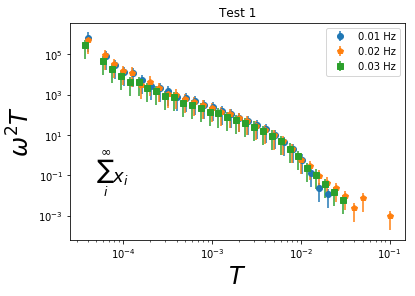

In [59]:
# Problem: how can we use this list of markers in our plot? 
# There are different options
# This is not too bad. Let's use enumerate which gives us an index automatically
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
for i,filename in enumerate(filenames):
    x, y = np.loadtxt(filename,unpack=True)
    is_not_zero = y!=0
    x, y = x[is_not_zero], y[is_not_zero]
    yerr = y * 0.8
    material, freq, meas = filename.split("_")
    lb = "{0} Hz".format(freq)
    ax.errorbar(x,y,yerr,fmt=markers[i],label=lb)    
ax.legend()
ax.set_xlabel("$T$", size=24)
ax.set_ylabel("$\omega^2 T$", size=24)
ax.annotate("$\sum_i^\infty x_i$", (5e-5,.05), size=18)
ax.set_title("Test 1")

Text(0.5, 1.0, 'Test 1')

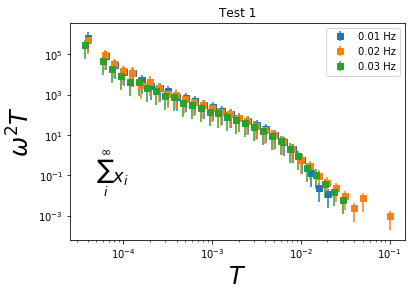

In [62]:
# This is also nice, and it is MUCH safer. Why?
mks = markers[:len(filenames)] 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
for filename,marker in zip(filenames,mks):
    x, y = np.loadtxt(filename,unpack=True)
    is_not_zero = y!=0
    x, y = x[is_not_zero], y[is_not_zero]
    yerr = y * 0.8
    material, freq, meas = filename.split("_")
    lb = "{0} Hz".format(freq)
    ax.errorbar(x,y,yerr,fmt=markers[i],label=lb)    
ax.legend()
ax.set_xlabel("$T$", size=24)
ax.set_ylabel("$\omega^2 T$", size=24)
ax.annotate("$\sum_i^\infty x_i$", (5e-5,.05), size=18)
ax.set_title("Test 1")


In [63]:
# Zip is a nice tool to join to arrays, or list
zip(filenames, mks)

In [64]:
for filename, marker in zip(filenames, mks):
    print(filename, marker)


F64ac_0.01_T.dat o
F64ac_0.02_T.dat p
F64ac_0.03_T.dat s


### Satisfied?

Excercise
=========
The three files F64ac_freq_sp.dat are the power spectra $S$ of magnetic noise signals taken at three different frequencies $f_H$ of an applied magnetic field .

I remember that the *amplitude* of the power spectra rescales, i.e. it is proportional, with the frequency $f_H$, but I do not remember if it is directly or inversely proportional.

In other words, if $S / f_H$ or $S f_H$ shows a good collapse of the data.

Would you please check it for me?

ps. Or are they already rescaled?